In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

result_df = pd.read_csv("/home/isaac/Continuosity/MESS/MESS/default_MESS/SIMOUT.txt", sep="\t", header=0)
neut_df = result_df[result_df["community_assembly_model"] == "neutral"]
comp_df = result_df[result_df["community_assembly_model"] == "competition"]
pw_comp_df = result_df[result_df["community_assembly_model"] == "pairwise_competition"]
print(len(comp_df))

# Sumstats start at "S" which is index 21, e.g. cmp_mean_res.iloc[:, 21:]
ss_start_idx = list(cmp_mean_res.columns).index("S")
ss_columns = cmp_mean_res.columns[21:]
result_df

0


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,100,750000,2.0,0.7,2.0,5.0,0.1,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,22.0,0.102,0.01045,0.00309,0.58824,1.53866,11.0,1.54416,1.17744,1.13137,1.11597,2.82843,2.66667,2.52982,2.42283,0.00013,0.00023,1.54432,1.06640,0.0,0.00018,0.00435,0.00375,0.91351,0.29048,0.00351,0.00430,0.0,10.96442,8.90941,8.13452,7.72092,0.72284,1.59209,0.37909,-0.59044,0.48975,1.89053,0.36630,2.28722,0.43527,-0.32800,0.02143,3.30510,-0.35654,0.69513,0.05618,0.26244,-0.46832,1.41457,0.12965,-0.09458,0.25930,0.61507,-0.27273,-0.08124,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1,100,750000,2.0,0.7,2.0,5.0,0.1,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,23.0,0.106,0.01043,0.00304,0.58824,1.05283,12.0,1.52511,1.17713,1.13137,1.11597,3.65774,3.38983,3.19847,3.06552,0.00019,0.00031,1.34779,0.39748,0.0,0.00035,0.00370,0.00426,1.42913,0.50218,0.00211,0.00281,0.0,9.74466,7.73840,7.25206,7.04022,1.30461,1.88832,1.04552,-0.06367,0.83853,2.21329,0.33444,1.60142,0.61459,0.63845,0.35500,1.91500,-0.97017,-0.28690,-0.43093,0.70212,-0.48353,-0.29829,0.28883,0.69756,-0.39580,0.21271,0.32867,0.22105,8.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0
2,100,750000,2.0,0.7,2.0,5.0,0.1,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,23.0,0.106,0.01017,0.00226,0.58824,2.21372,10.0,1.52222,1.17004,1.12587,1.11114,2.83872,2.72340,2.64382,2.58865,0.00019,0.00031,1.21148,-0.27516,0.0,0.00026,0.00407,0.00558,1.77345,1.99267,0.00184,0.00364,0.0,9.82765,9.09935,8.82509,8.63131,-2.06658,2.43070,-0.59905,-0.09225,-2.30414,2.56388,-2.00303,2.02619,0.62563,0.41079,-2.40946,2.49834,0.06354,-0.40451,1.22468,0.50303,-0.10532,-0.06554,0.70772,0.44537,0.28837,0.15707,0.32827,0.41012,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,100,750000,2.0,0.7,2.0,5.0,0.1,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,29.0,0.104,0.00959,0.00241,0.58824,-1.97482,14.0,1.61258,1.19768,1.14626,1.12903,1.96757,1.93701,1.90905,1.88408,0.00017,0.00042,2.19400,3.07297,0.0,0.00000,0.00318,0.00271,0.67453,-0.97050,0.00246,0.00456,0.0,13.49955,10.93244,9.30159,8.25939,1.24475,3.09329,-0.82198,-0.84608,2.58421,4.67599,0.44665,2.98125,-0.01581,-0.94874,0.49197,5.01569,-0.79811,-0.11204,0.80618,-0.10266,-2.09224,0.33970,0.38674,0.32962,0.22075,0.56319,0.36304,0.28128,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,100,750000,2.0,0.7,2.0,5.0,0.1,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,21.0,0.121,0.01086,0.00257,0.58824,-5.74166,18.0,1.64928,1.20562,1.15194,1.13400,3.76388,3.59301,3.47079,3.38151,0.00015,0.00031,1.72705,1.37266,0.0,0.00000,0.00313,0.00365,1.35520,1.23123,0.00193,0.00500,0.0,12.26105,8.84403,7.73617,7.21199,-2.51703,2.77716,0.42045,-0.94134,-2.71306,4.48278,-2.58804,3.02954,0.42129,-0.60859,-2.89272,4.74336,-0.07101,0.25237,0.00084,0.33275,-0.17966,0.26057,0.54216,0.42327,-0.07787,0.44959,-0.08655,-0.00850,14.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
5,100,750000,2.0,0.7,2.0,5.0,0.1,neutral,point_mutation,0.0,2000,570.0,1000.0,0.01,0.0,18.0,0.11

In [2]:
ttvals, ttres = stats.ttest_ind(cmp_mean_res.iloc[:, 21:], cmp_pw_res.iloc[:, 21:])

/home/isaac/miniconda3/envs/ipyrad_py37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/isaac/miniconda3/envs/ipyrad_py37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/isaac/miniconda3/envs/ipyrad_py37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [3]:
pd.DataFrame(ttres, index=ss_columns).T

,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,1.136806e-26,9.641702e-14,1.151599e-10,1.234019e-09,3.928370e-09,3.035102e-09,3.435326e-09,4.879833e-09,7.027404e-09,0.335819,0.552689,0.000393,0.000668,0.126382,0.545937,0.00952,0.469226,0.000002,3.306610e-07,0.030737,0.300089,NaN,1.693265e-08,0.000002,0.000014,0.000046,0.095969,0.000002,0.976683,1.713059e-15,0.107173,8.501364e-09,0.216438,0.600442,0.296566,0.285541,0.495876,0.879737,0.196154,2.187315e-14,0.310022,7.805246e-13,0.082595,2.425733e-15,0.230954,0.910762,0.943894,0.338009,2.339330e-07,0.056025,3.412695e-13,0.001124,0.002772,0.009639,0.0025,0.730295,0.001562,0.45286,0.038254,0.071315


/home/isaac/miniconda3/envs/ipyrad_py37/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/isaac/miniconda3/envs/ipyrad_py37/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([33.,  4.,  2.,  0.,  3.,  1.,  5.,  0.,  0.,  2.,  1.,  2.,  1.,
         0.,  1.,  0.,  0.,  0.,  2.,  2.]),
 array([1.13680591e-26, 4.88341620e-02, 9.76683240e-02, 1.46502486e-01,
        1.95336648e-01, 2.44170810e-01, 2.93004972e-01, 3.41839134e-01,
        3.90673296e-01, 4.39507458e-01, 4.88341620e-01, 5.37175782e-01,
        5.86009944e-01, 6.34844106e-01, 6.83678268e-01, 7.32512430e-01,
        7.81346592e-01, 8.30180754e-01, 8.79014916e-01, 9.27849078e-01,
        9.76683240e-01]),
 <a list of 20 Patch objects>)

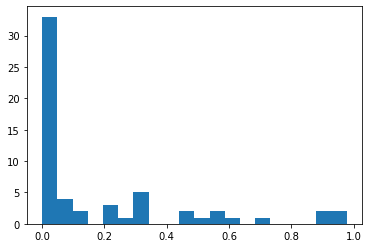

In [4]:
plt.hist(ttres, bins=20)

Text(0.5, 0.98, '_lambda')

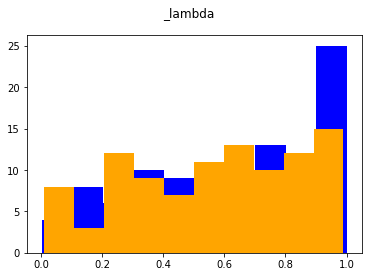

In [5]:
param = "_lambda"
plt.hist(cmp_mean_res[param], color='blue')
plt.hist(cmp_pw_res[param], color='orange')
plt.suptitle(param)

66


/home/isaac/miniconda3/envs/ipyrad_py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


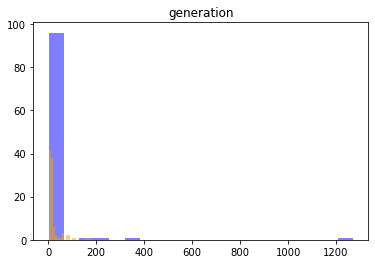

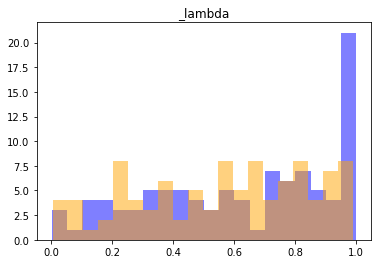

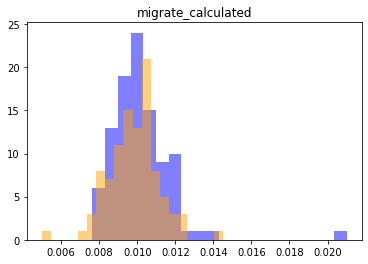

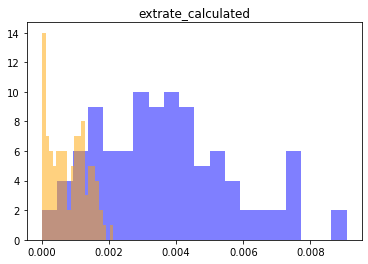

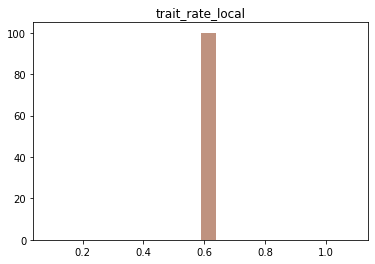

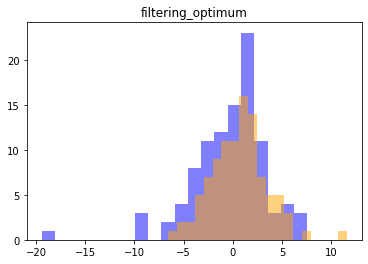

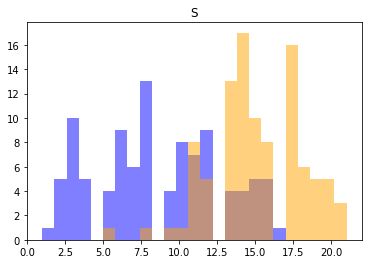

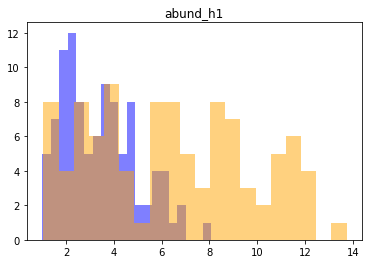

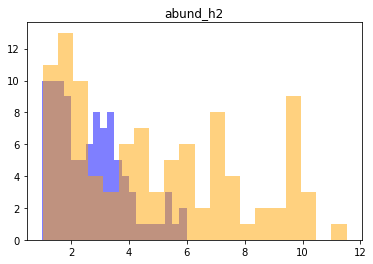

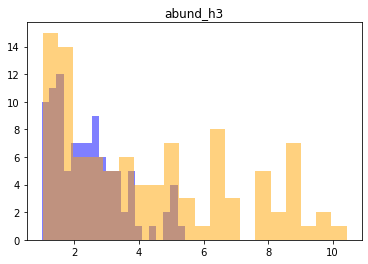

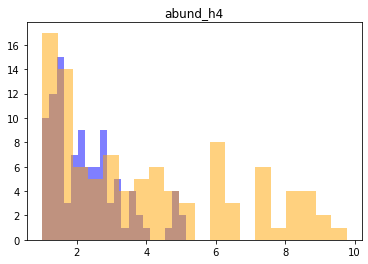

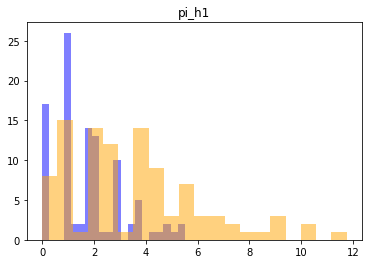

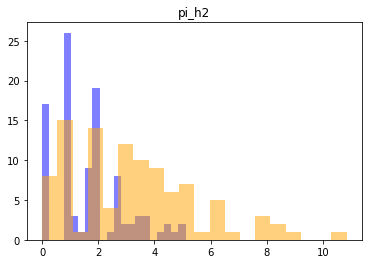

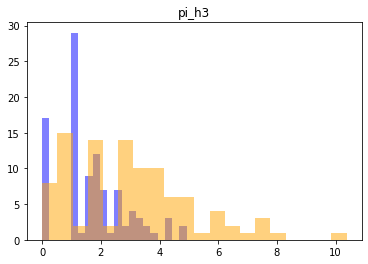

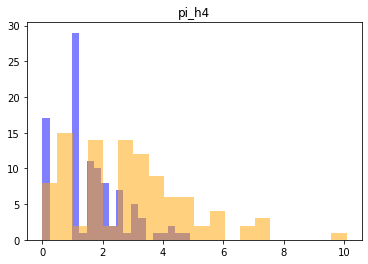

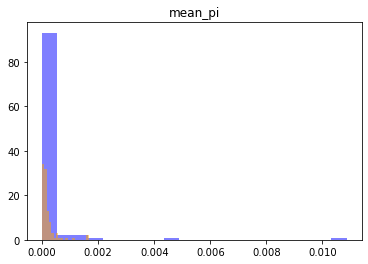

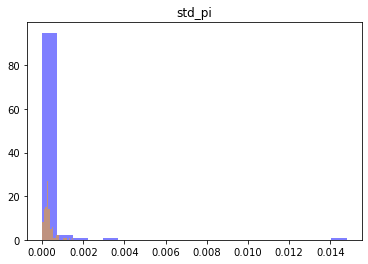

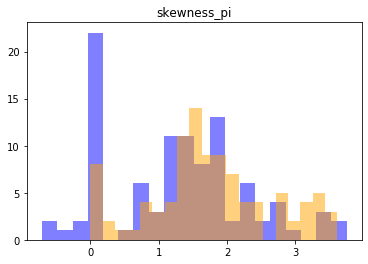

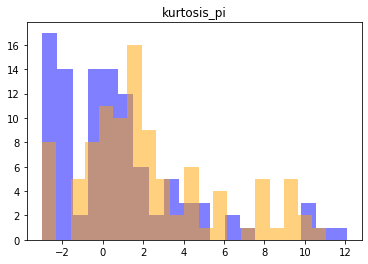

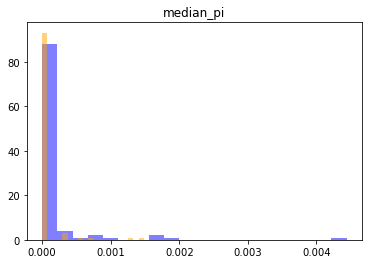

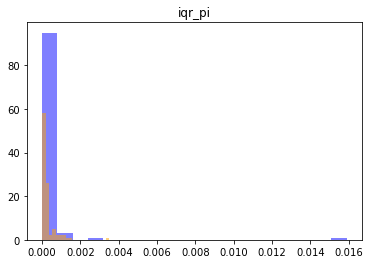

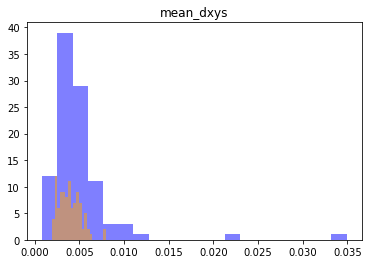

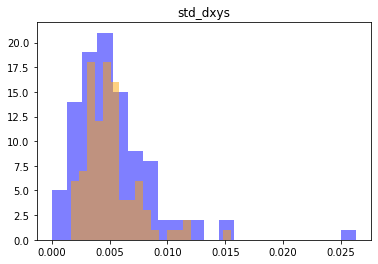

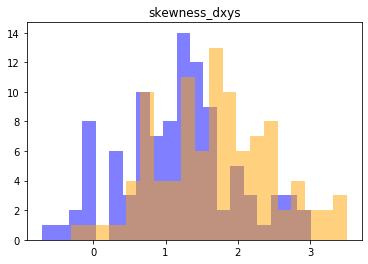

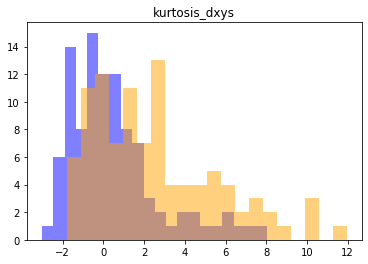

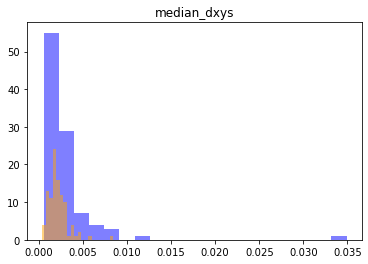

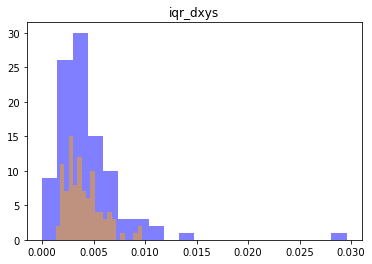

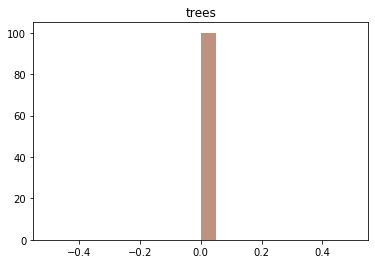

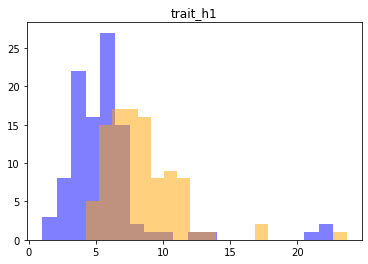

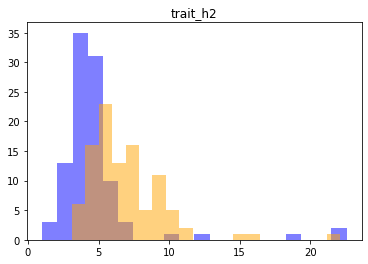

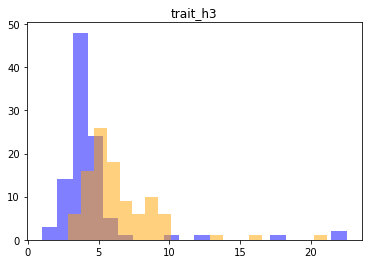

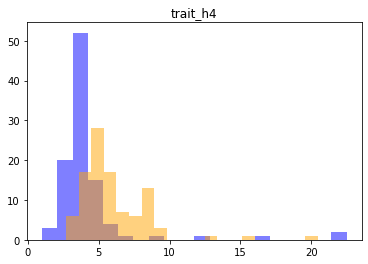

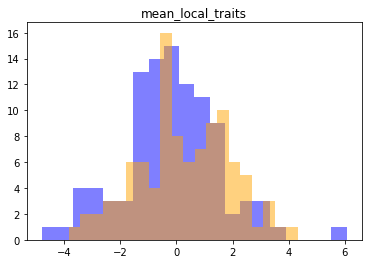

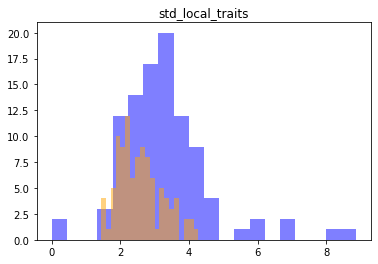

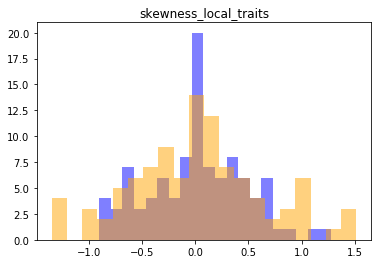

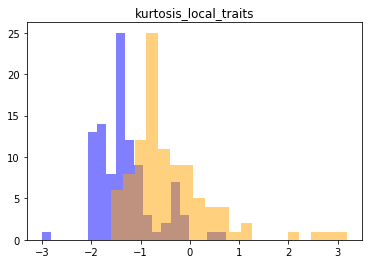

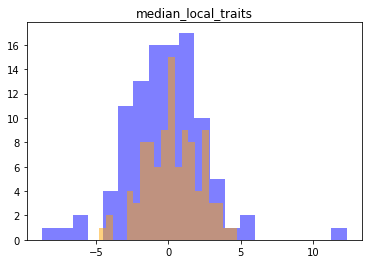

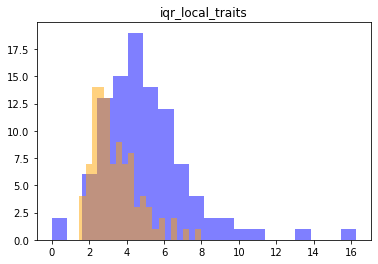

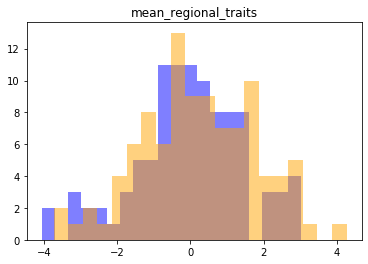

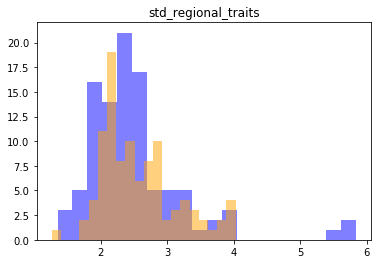

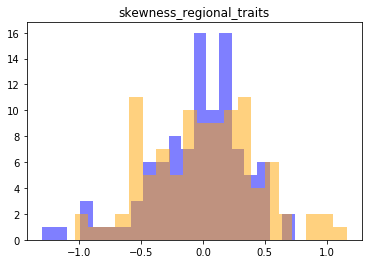

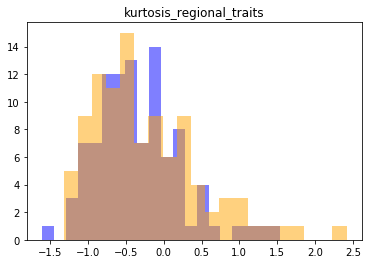

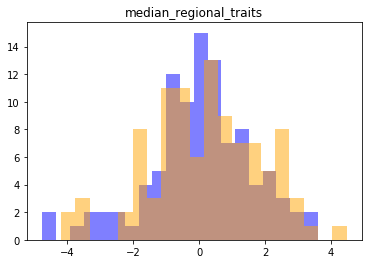

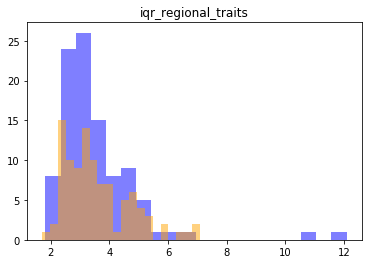

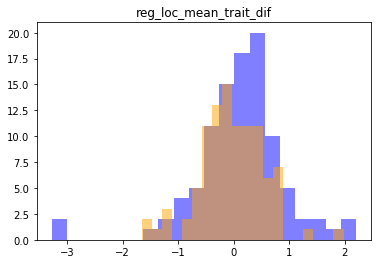

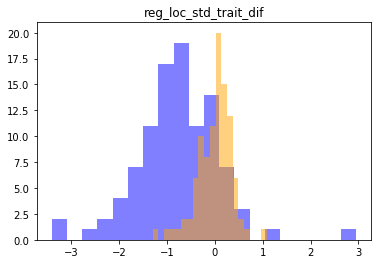

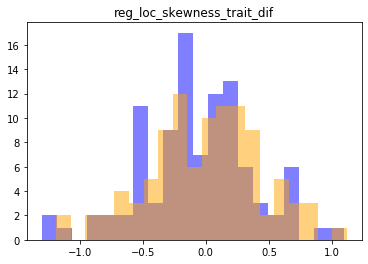

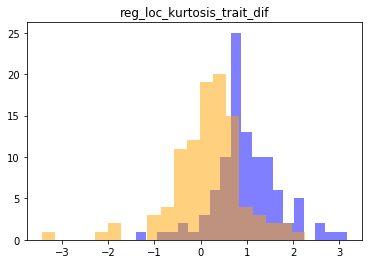

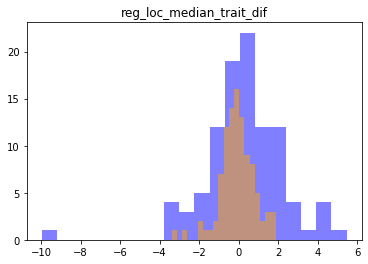

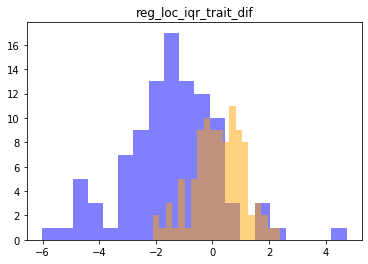

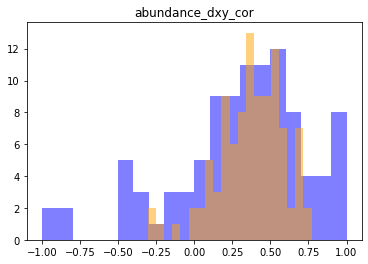

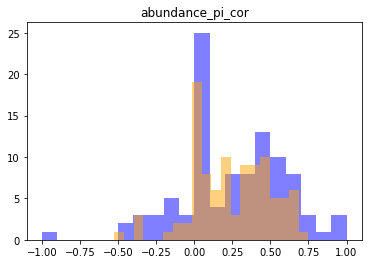

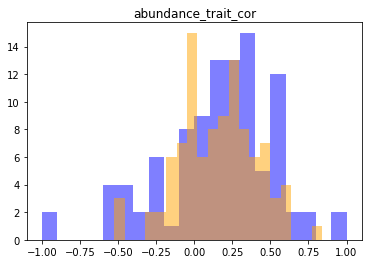

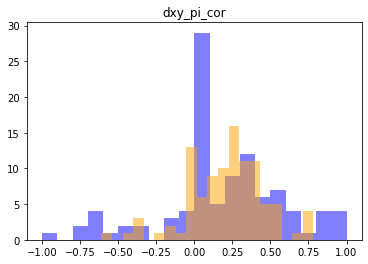

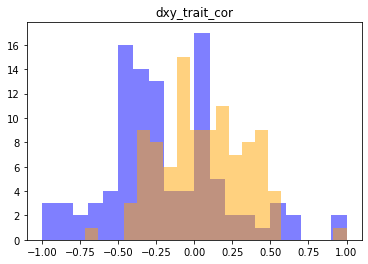

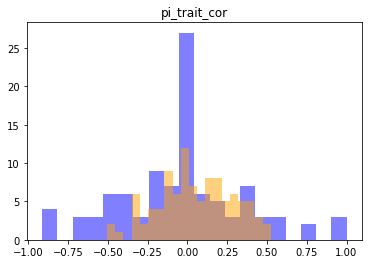

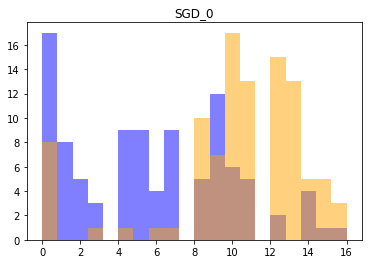

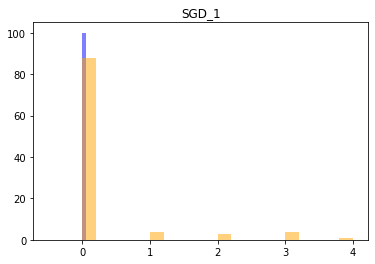

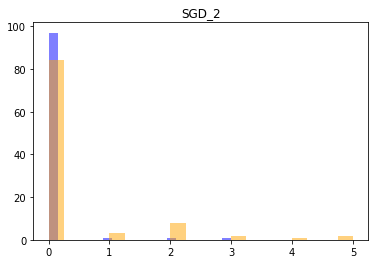

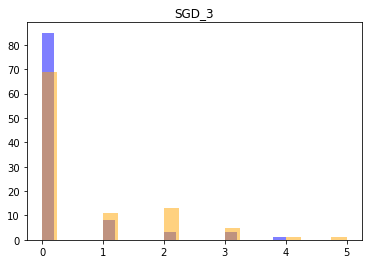

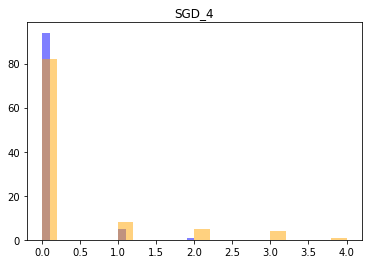

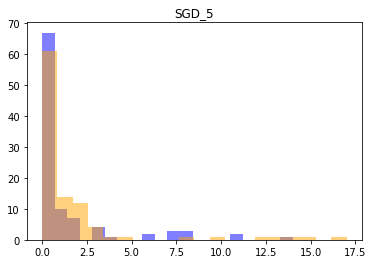

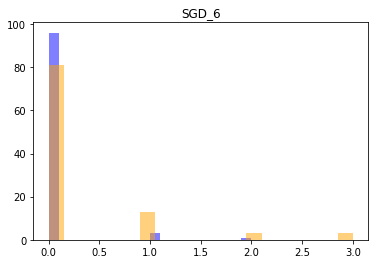

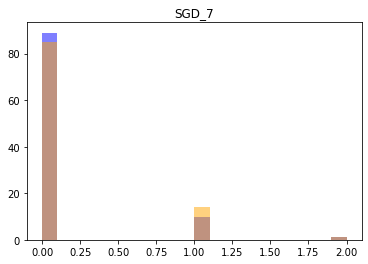

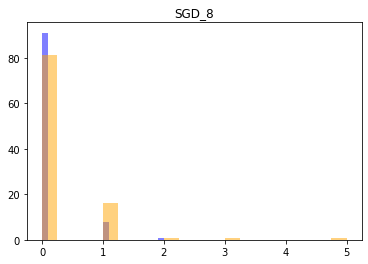

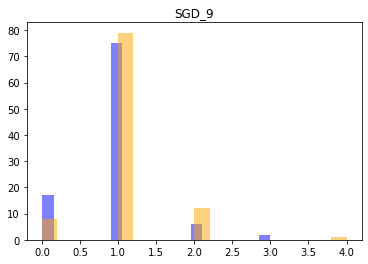

In [6]:
# How many sumstats?
print(len(cmp_mean_res.columns[15:]))
# Plot all the sumstats one at a time
for p in list(cmp_mean_res.columns)[15:]:
    fig, ax = plt.subplots()
    ax.hist(cmp_mean_res[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)

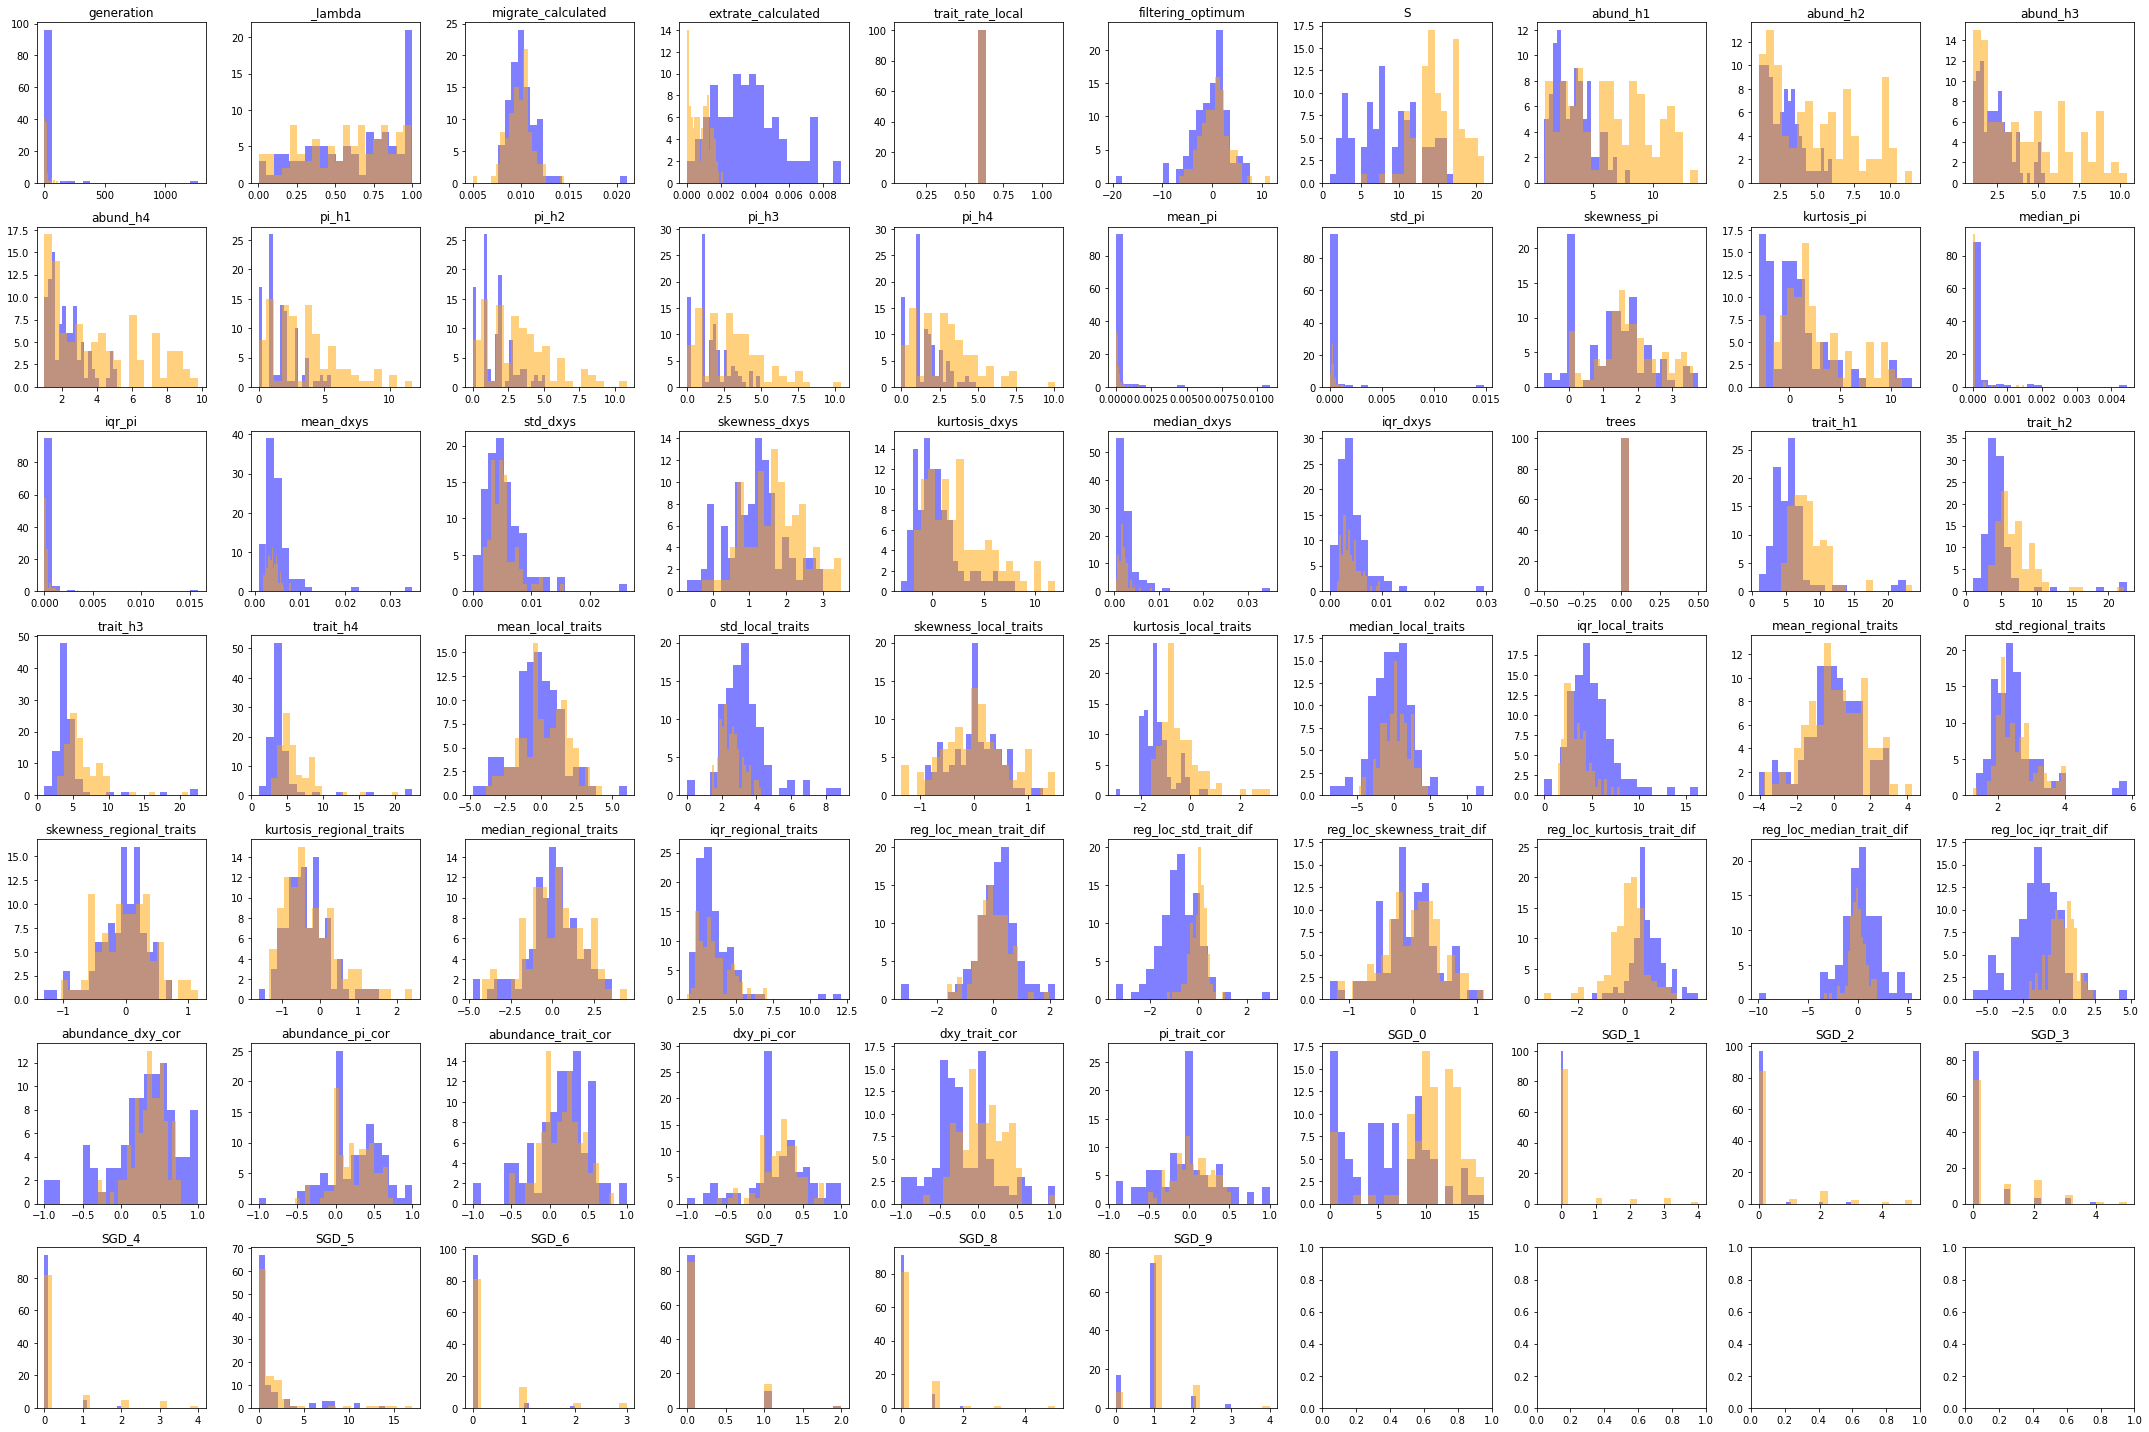

In [7]:
# This is annoying, so we can plot them in one giant figure
# Mean is blue
# pairwise is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(cmp_mean_res.columns)[15:], axs):
    ax.hist(cmp_mean_res[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()